In [1]:
!pip install autoviz


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Imports

import seaborn as sns
import matplotlib as plt
import pandas as pd
import missingno as msno
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv", index_col=False)

In [5]:
#Loan_ID is an identification columns and can be dropped 

df = df.drop(columns=['Loan_ID'])

In [6]:
#Basic info

print('\nINFO')
print(df.info())

print('\nSHAPE')
print(df.shape)

print('\nDESCRIPTION')
df.describe().T.round(2)


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None

SHAPE
(614, 12)

DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [7]:
def plot_countplot_with_annotations(df, column, hue=None):
    sns.set(style="whitegrid")
    ax = sns.countplot(x=column, data=df, hue=hue)

    total = len(df[column])

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom')

    plt

None


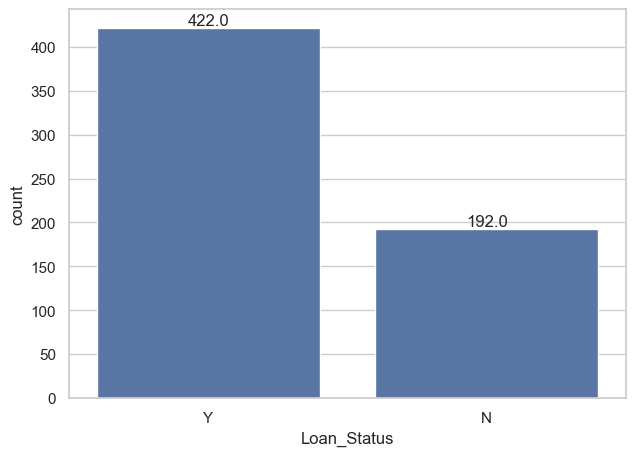

In [8]:
#Target values distributions and basic info.

print(plot_countplot_with_annotations(df, 'Loan_Status'))

In [9]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Shape of your Data Set loaded: (614, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variable

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Gender,object,2.117264,0,,,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Married,object,0.488599,0,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Dependents,object,2.442997,0,,,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Education,object,0.000000,0,,,No issue
Self_Employed,object,5.211726,0,,,"32 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ApplicantIncome,int64,0.000000,82,150.000000,81000.000000,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,3.583062,NA,9.000000,700.000000,"22 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 39 outliers greater than upper bound (270.00) or lower than lower bound(-2.00). Cap them or remove them."
Loan_Amount_Term,float64,2.280130,NA,12.000000,480.000000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them."
Credit_History,float64,8.143322,0,,,"50 missing values. Impute them with mean, median, mode, or a constant value such as 123."


Number of All Scatter Plots = 6


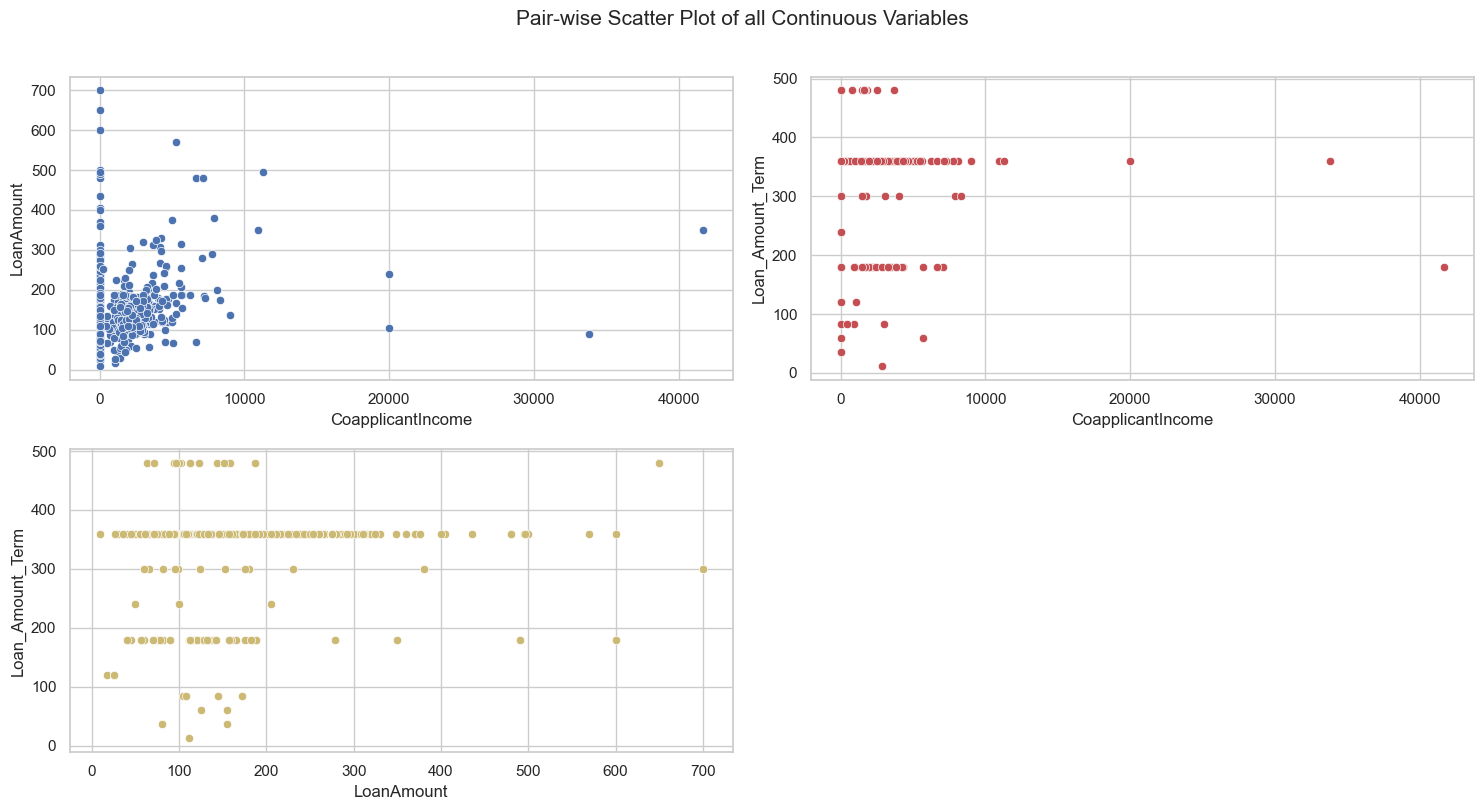

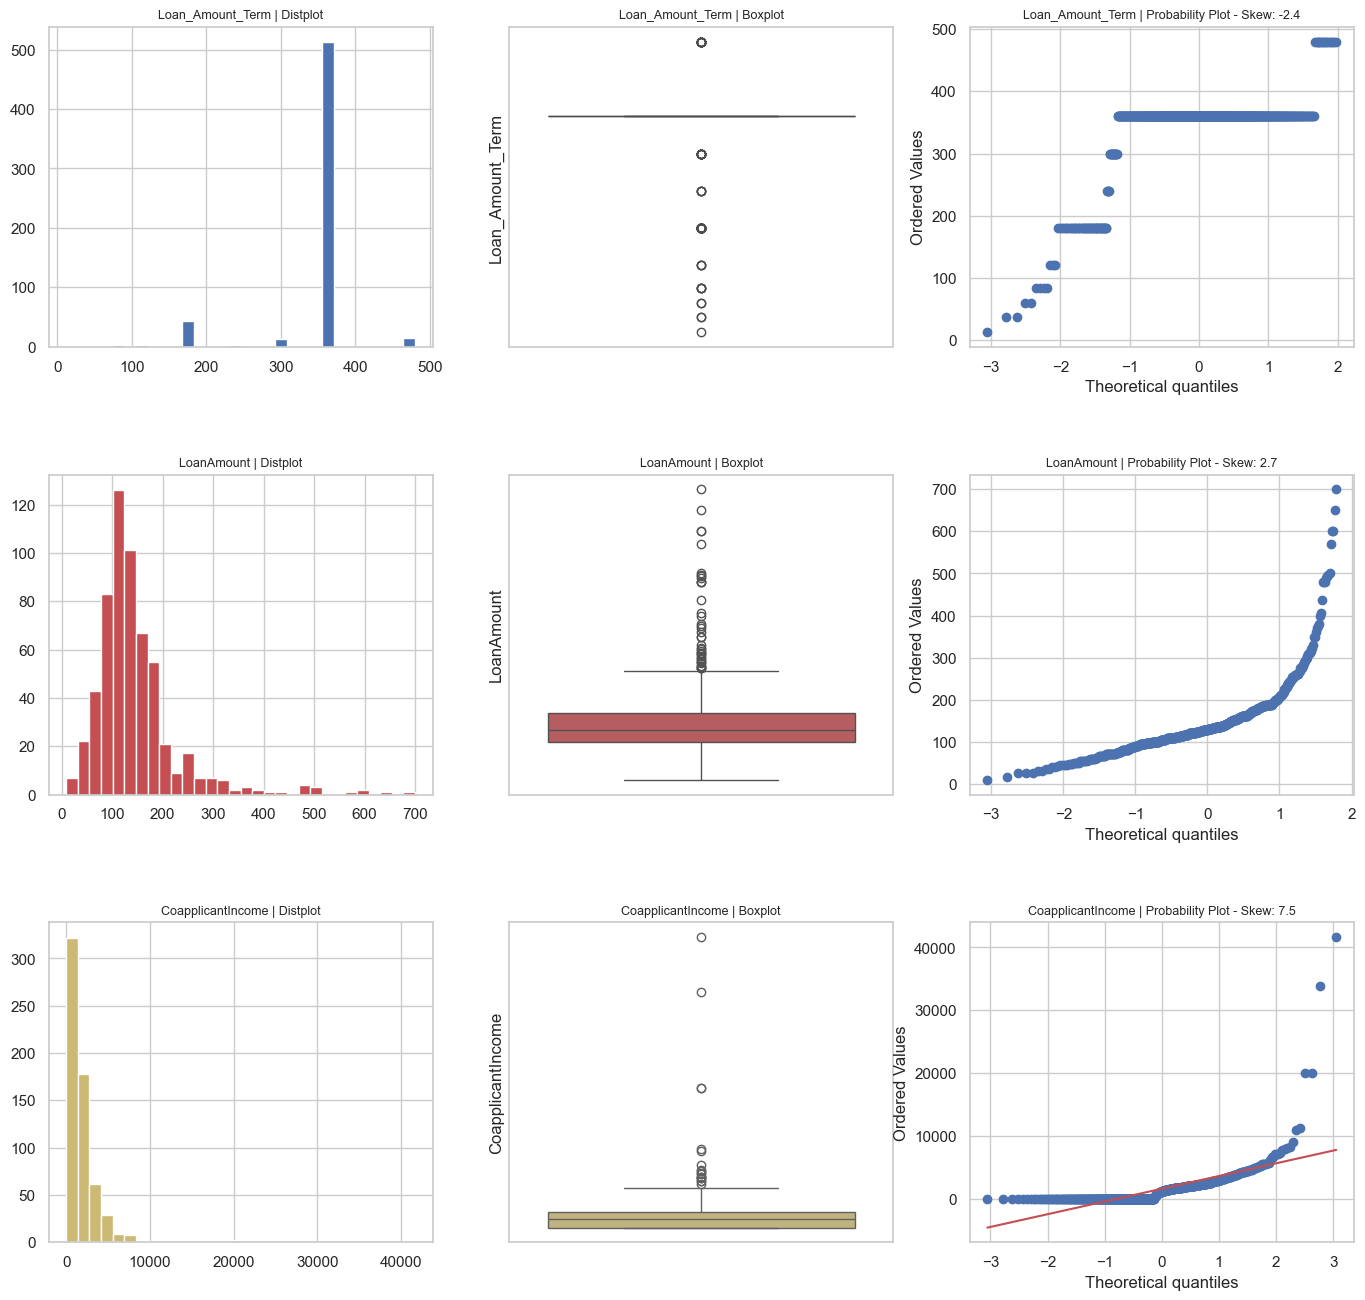

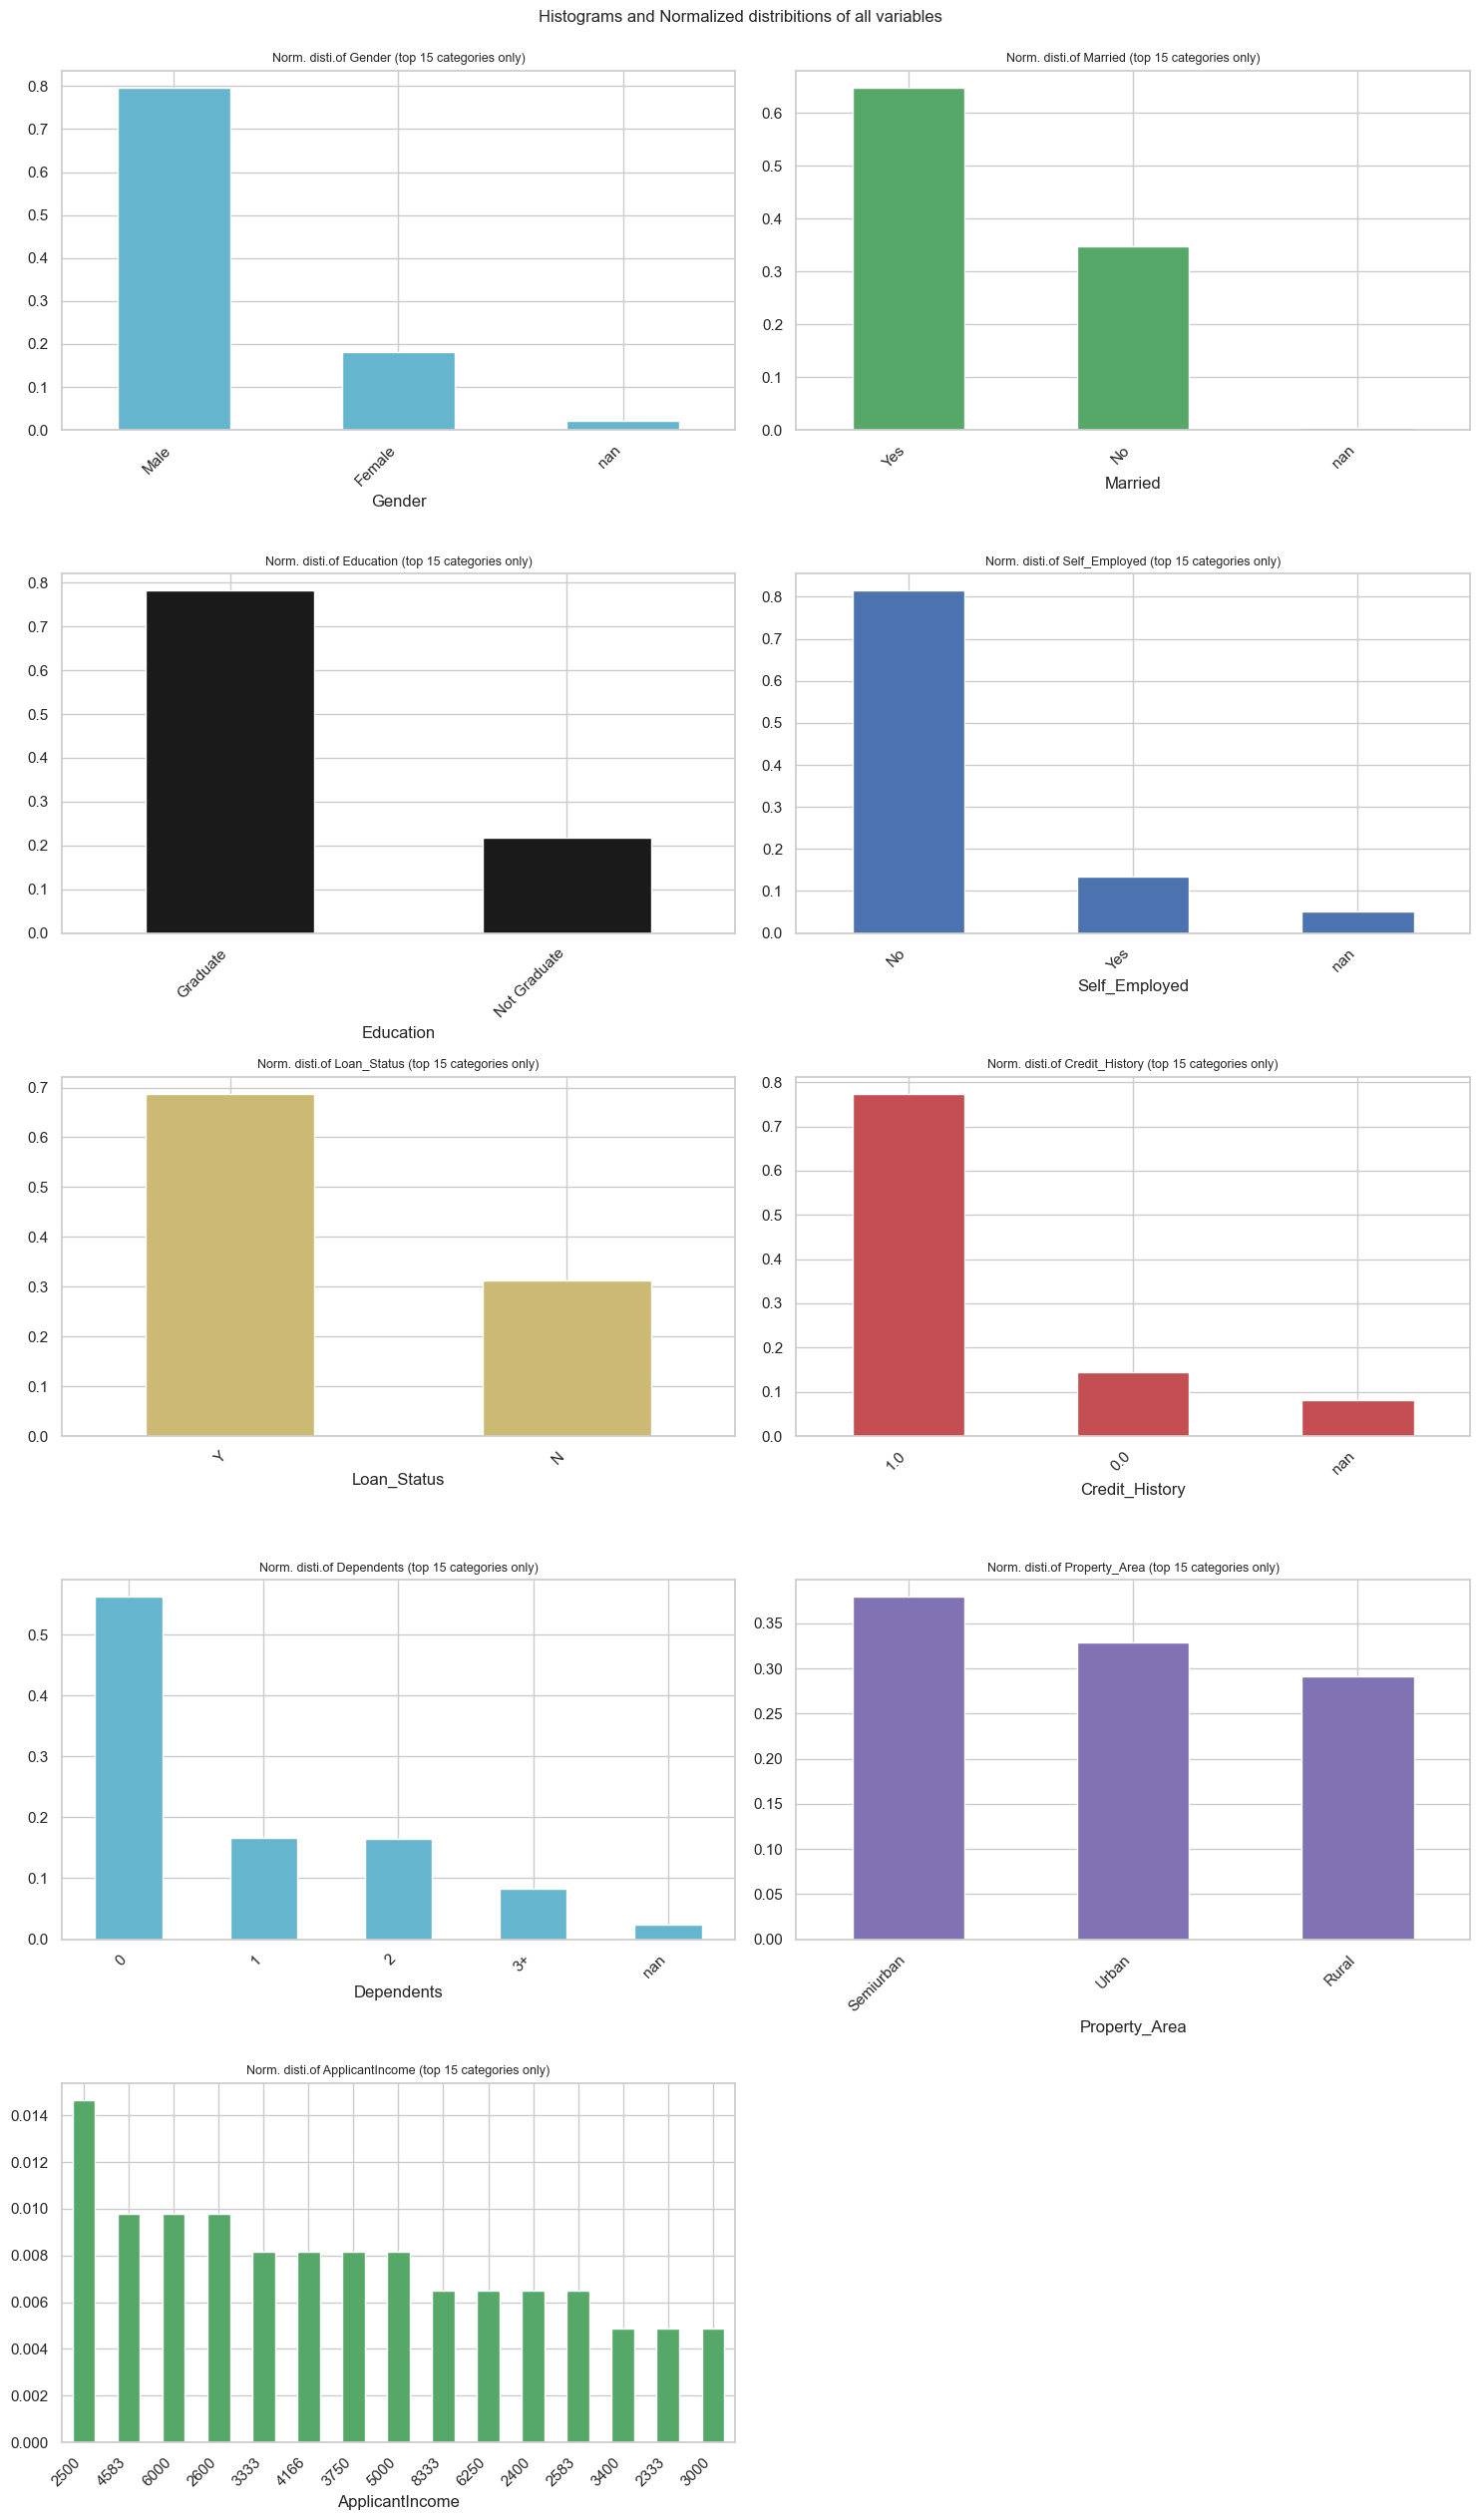

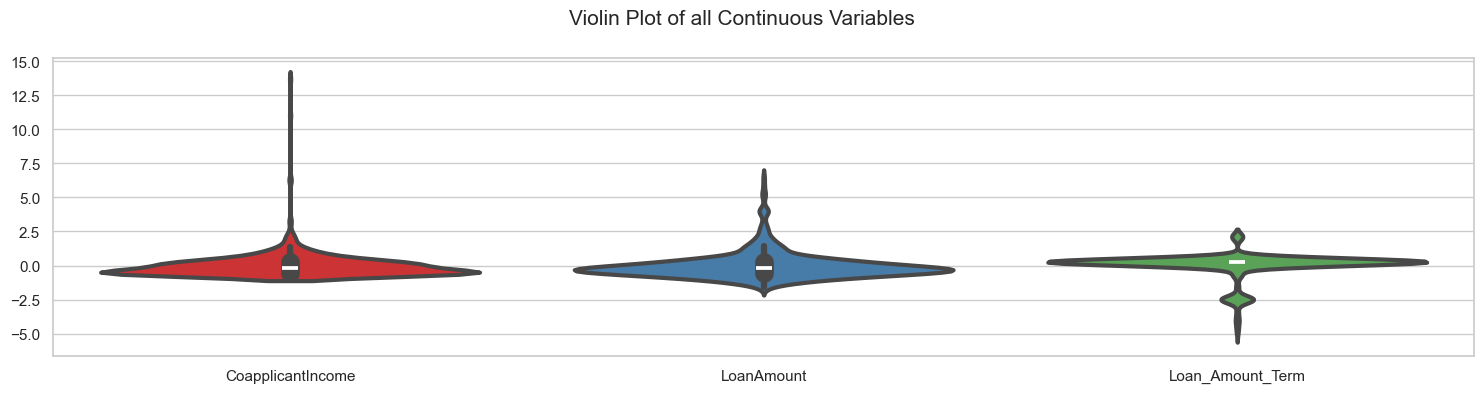

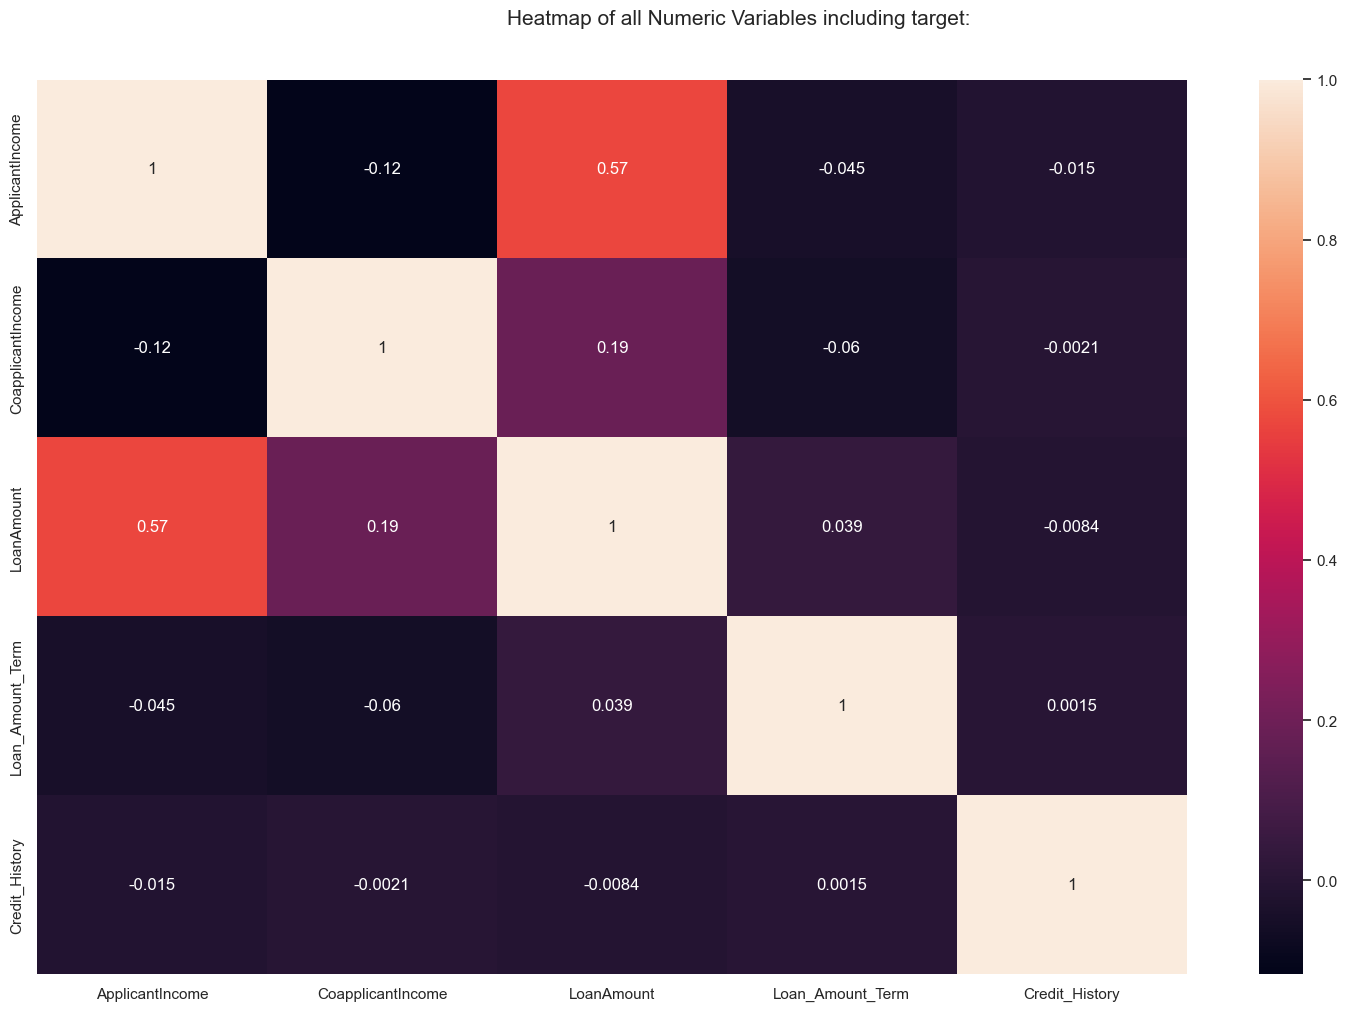

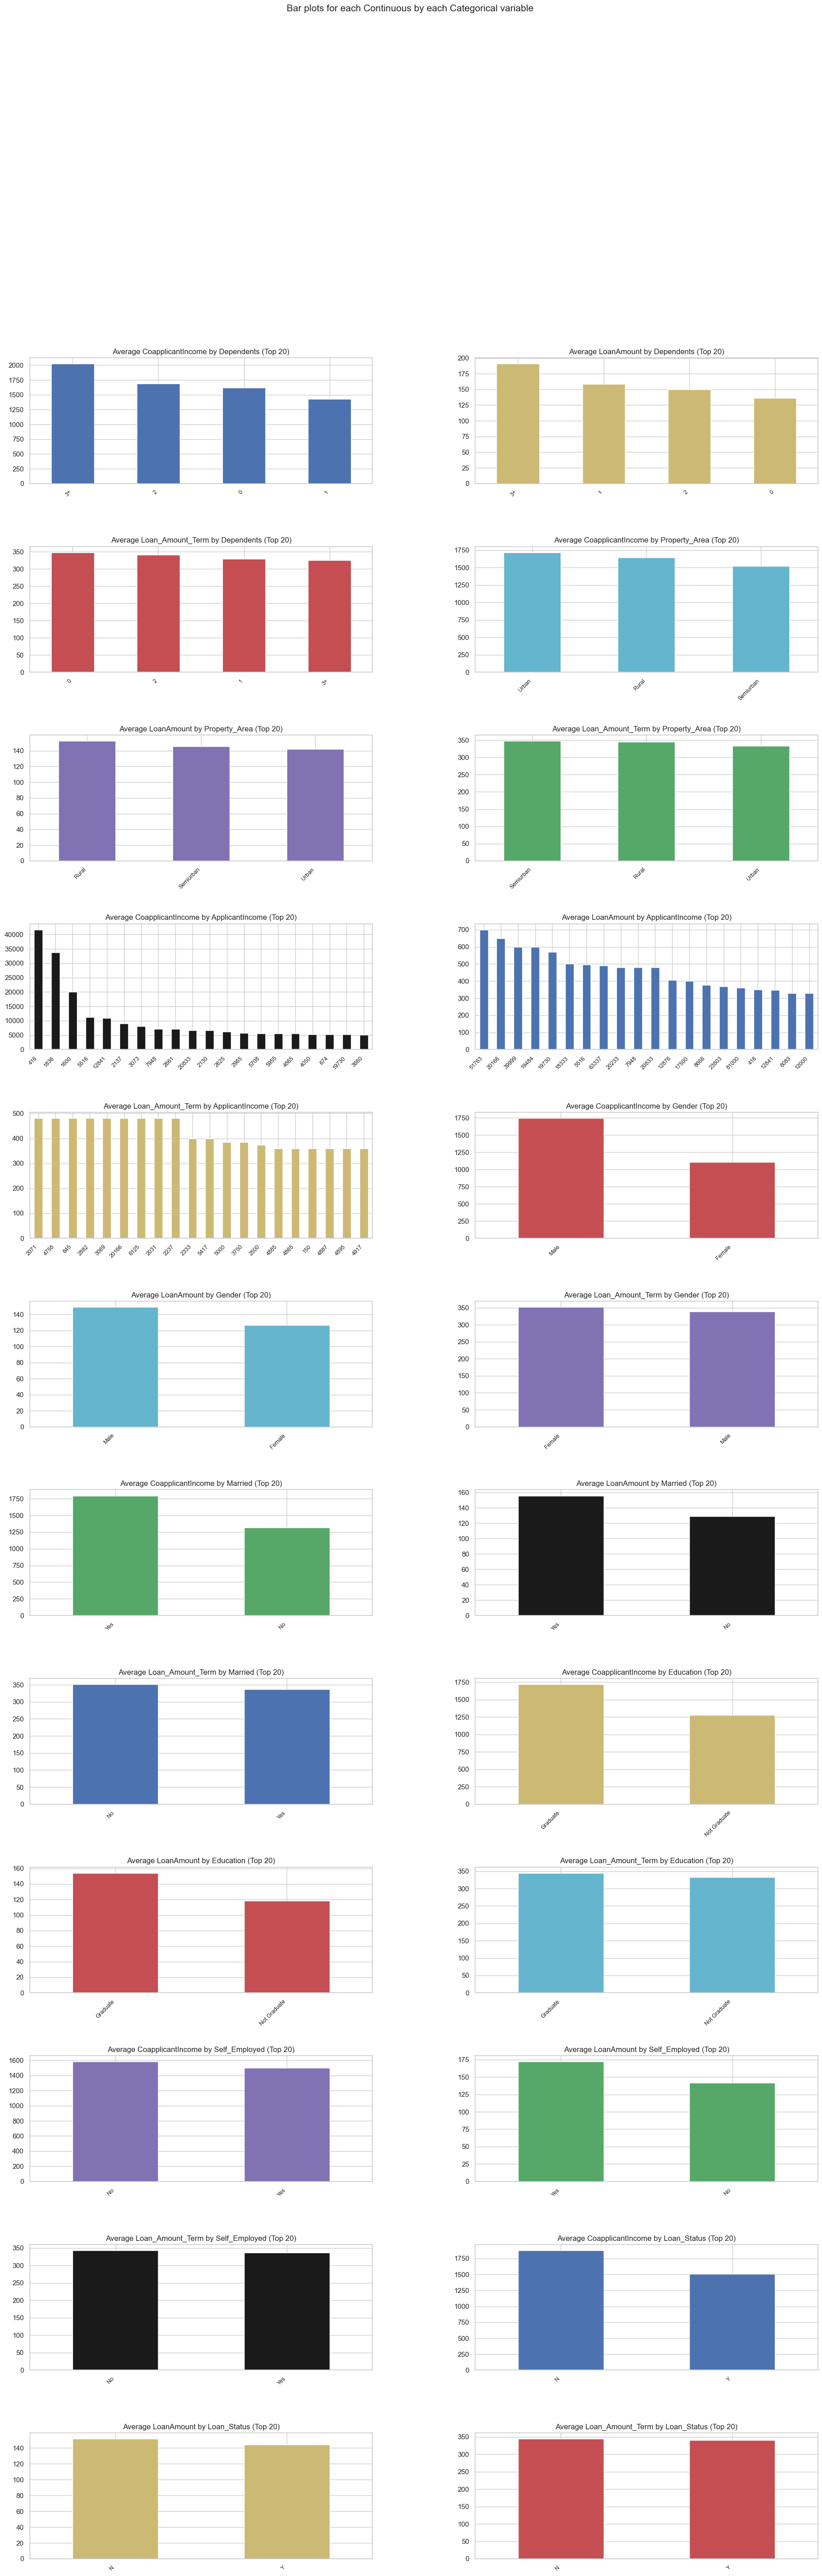

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
#Data frame basic info and infographics: 

AV = AutoViz_Class()
AV.AutoViz(df)

<Axes: >

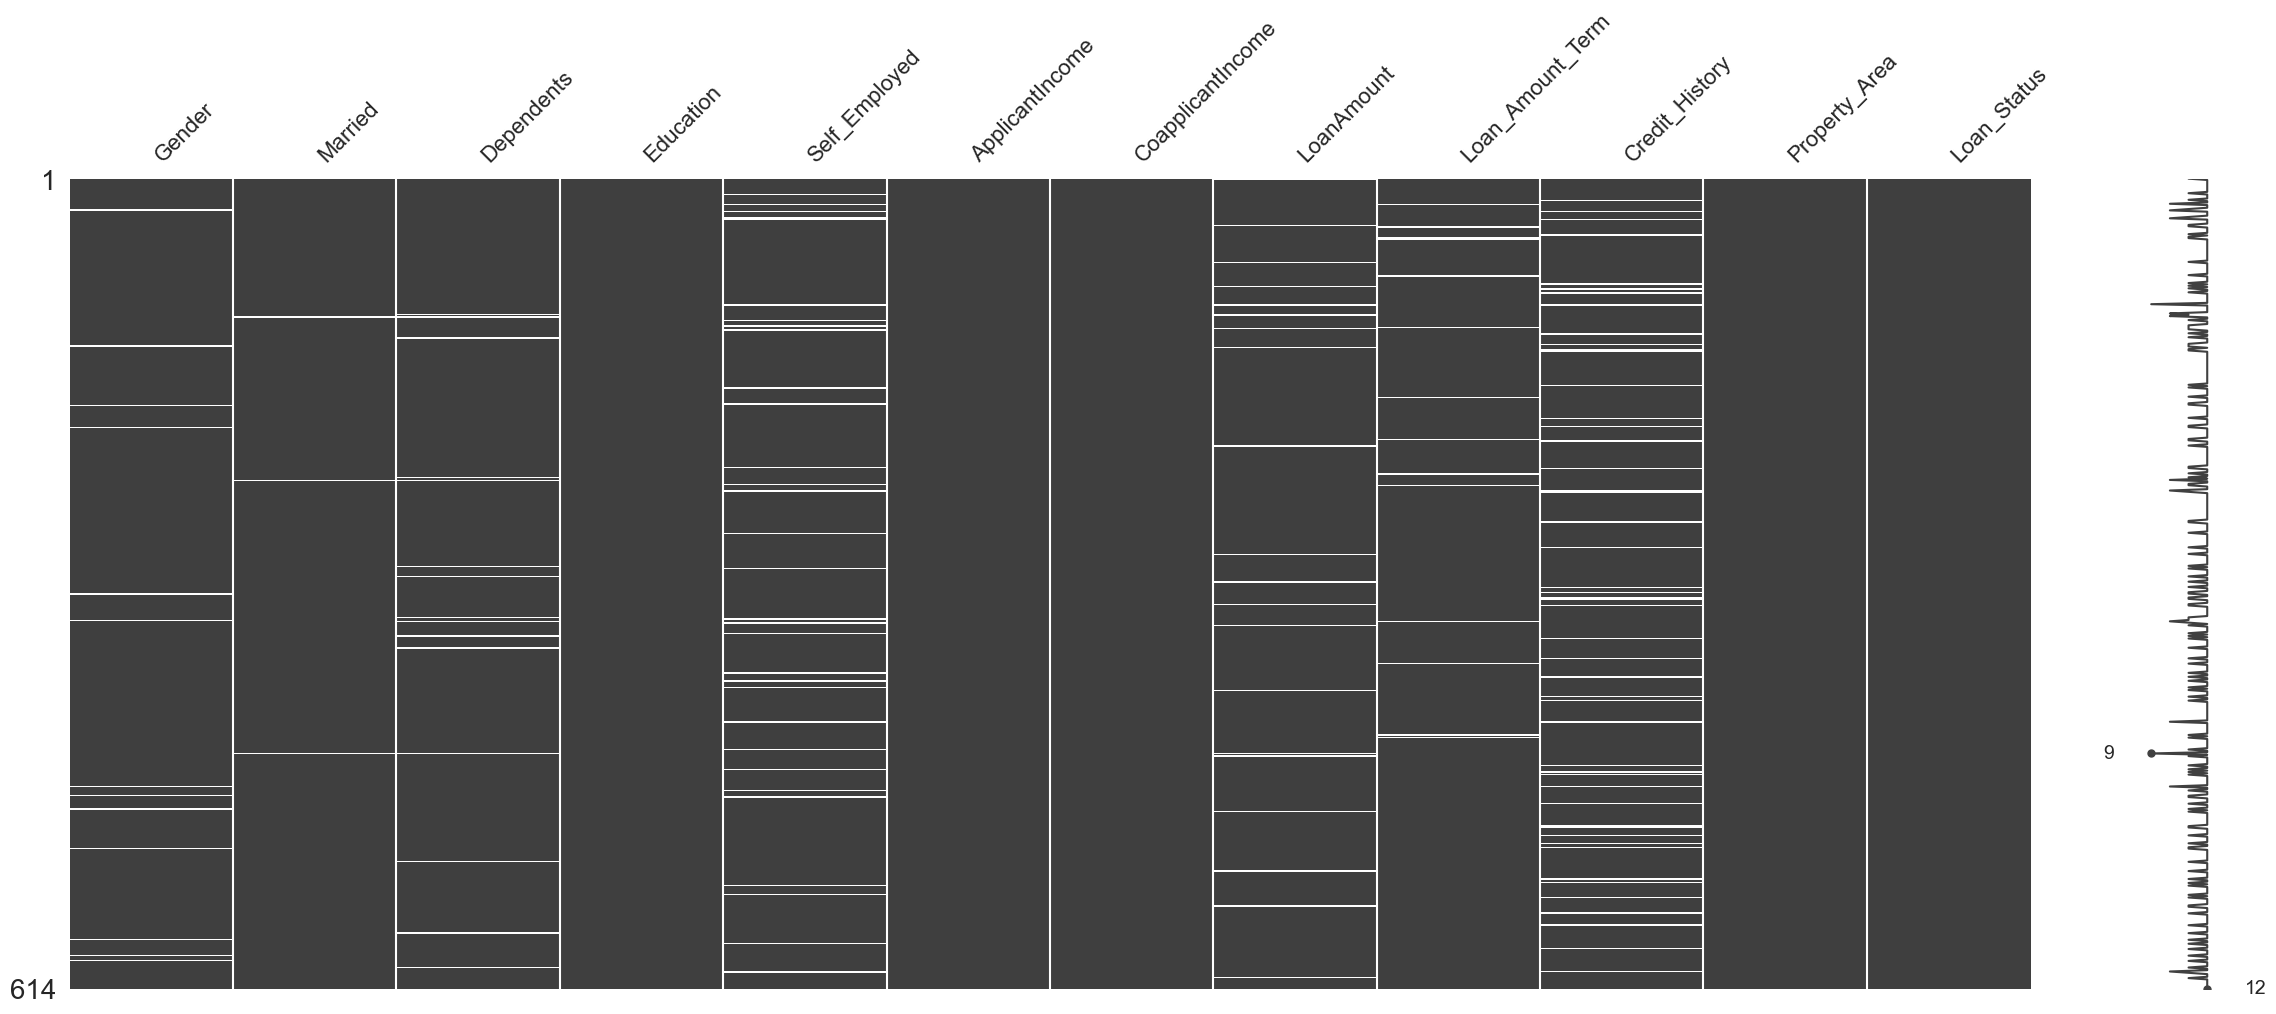

In [11]:
#Empty values data:
msno.matrix(df)

In [12]:
nan_columns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0] 
nan_percentage = (nan_counts / len(df)) * 100

nan_analysis = pd.DataFrame({
        'Column': nan_counts.index,
        'NaN Count': nan_counts.values,
        'NaN Percentage': nan_percentage.values})
print(nan_analysis)

        Column       NaN Count  NaN Percentage
0            Gender     13         2.117264   
1           Married      3         0.488599   
2        Dependents     15         2.442997   
3     Self_Employed     32         5.211726   
4        LoanAmount     22         3.583062   
5  Loan_Amount_Term     14         2.280130   
6    Credit_History     50         8.143322   


In [13]:
# Convert obj series to categorical

def convert_object_to_categorical(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

In [14]:
df = convert_object_to_categorical(df)

In [15]:
df.to_csv('loans_prep.csv')